<a href="https://colab.research.google.com/github/ZerXXX0/predicting-pulsar-star-using-machine-learning/blob/main/DKA%20Tubes%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.3 MB/s eta 0:00:00


In [ ]:
 import sympy as sp # import sympy
 import numpy as np # import numpy
 from sklearn.utils import resample
 import matplotlib.pyplot as plt # import matplotlib.pyplot
 import skfuzzy as fuzz # import skfuzzy

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/ZerXXX0/machine-learning-for-predicting-pulsar-star/main/pulsar_data_train.csv'
data = pd.read_csv(url,index_col = 0)
data = data.reset_index(drop=True)

In [ ]:
data = pd.read_csv(url, index_col=0, na_values=['', ' ', 'NA', 'NaN', 'nan'])
df = pd.DataFrame(data)
df = df.dropna()
df_majority = df[df['target_class'] == 0]
df_minority = df[df['target_class'] == 1]

# Oversample minority classes
df_minority_oversampled = resample(df_minority,
                                   replace=True,
                                   n_samples=len(df_majority),
                                   random_state=123)

# Regroup
df_balanced = pd.concat([df_majority, df_minority_oversampled])

# Verifying distribution of classes
print("\nDistribusi kelas setelah oversampling:")
print(df_balanced['target_class'].value_counts())
print(df_balanced.describe())


Distribusi kelas setelah oversampling:
target_class
0.0    8423
1.0    8423
Name: count, dtype: int64
        Standard deviation of the integrated profile  \
count                                   16846.000000   
mean                                       42.976085   
std                                         8.289322   
min                                        24.772042   
25%                                        36.574156   
50%                                        43.543182   
75%                                        49.114846   
max                                        91.808628   

        Excess kurtosis of the integrated profile  \
count                                16846.000000   
mean                                     1.671262   
std                                      1.993182   
min                                     -1.738021   
25%                                      0.179319   
50%                                      0.621967   
75%                  

In [ ]:
print(df_balanced.isnull().sum())

 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64


In [ ]:
print(df_balanced.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16846 entries, 121.15625 to 95.171875
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Standard deviation of the integrated profile  16846 non-null  float64
 1    Excess kurtosis of the integrated profile     16846 non-null  float64
 2    Skewness of the integrated profile            16846 non-null  float64
 3    Mean of the DM-SNR curve                      16846 non-null  float64
 4    Standard deviation of the DM-SNR curve        16846 non-null  float64
 5    Excess kurtosis of the DM-SNR curve           16846 non-null  float64
 6    Skewness of the DM-SNR curve                  16846 non-null  float64
 7   target_class                                   16846 non-null  float64
dtypes: float64(8)
memory usage: 1.2 MB
None


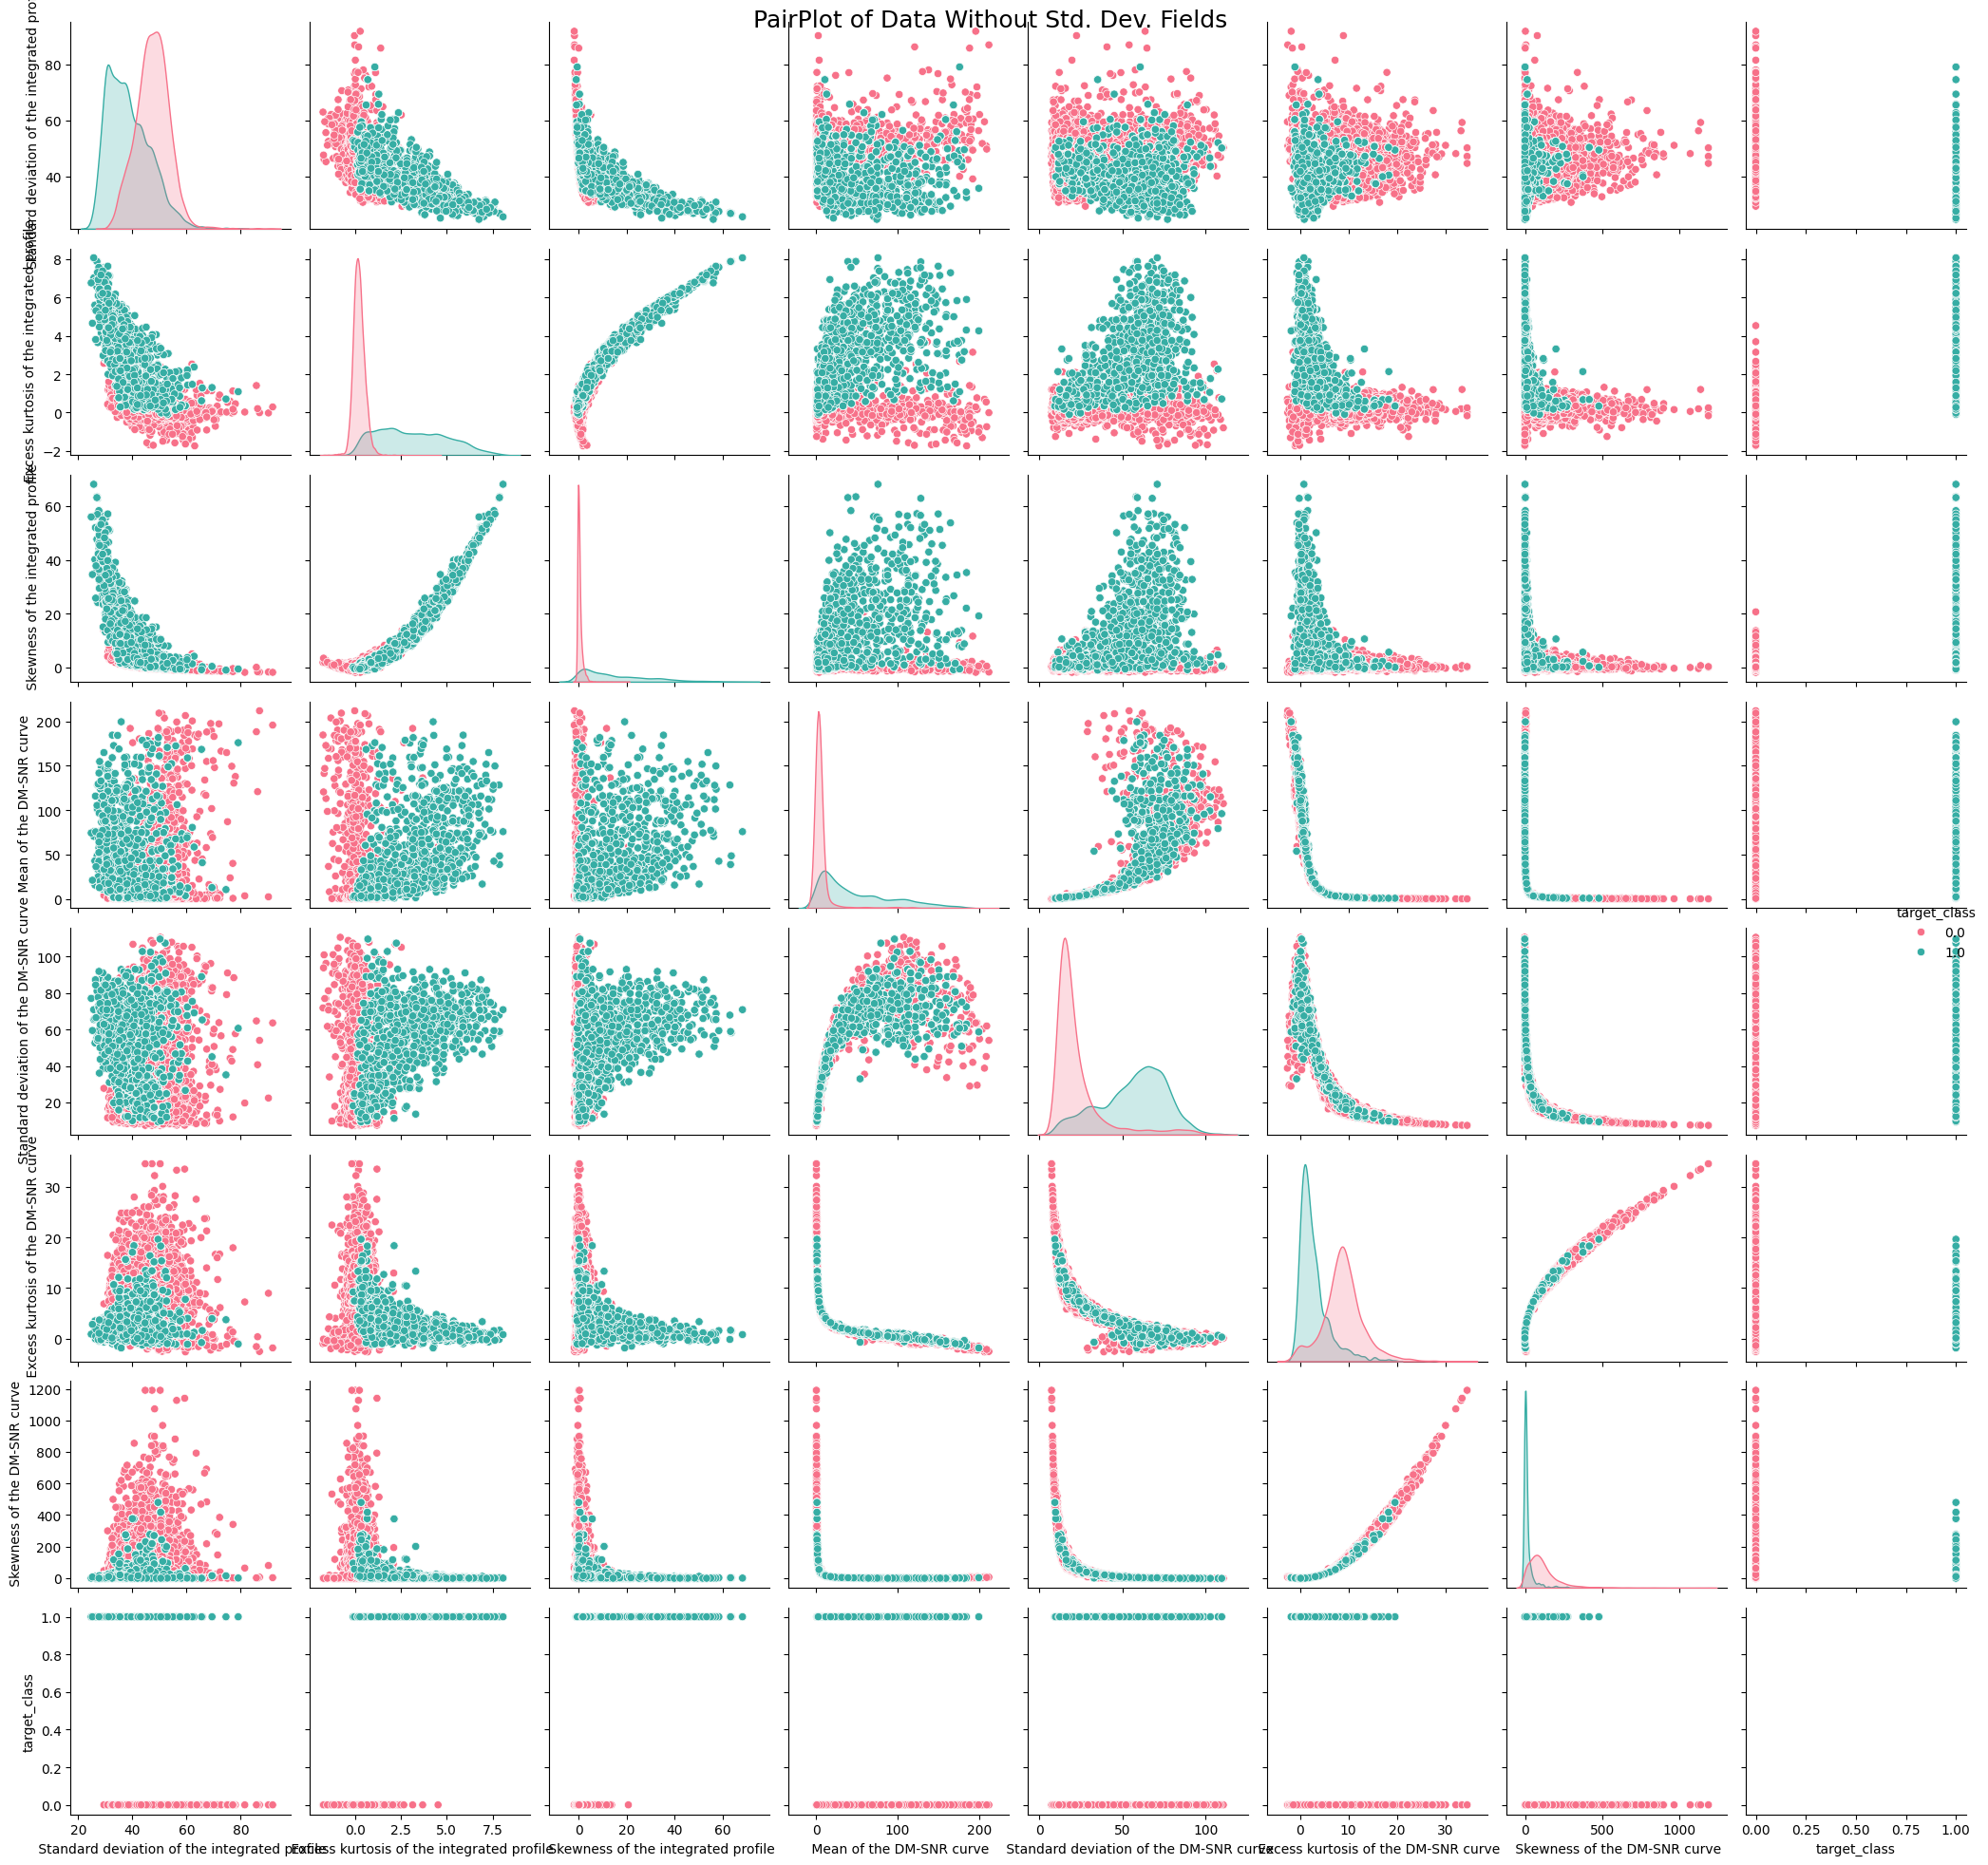

In [ ]:
import seaborn as sns

sns.pairplot(data=df_balanced,
             palette="husl",
             hue="target_class",
             vars=[" Standard deviation of the integrated profile",
                   " Excess kurtosis of the integrated profile",
                   " Skewness of the integrated profile",
                   " Mean of the DM-SNR curve",
                   " Standard deviation of the DM-SNR curve",
                   " Excess kurtosis of the DM-SNR curve",
                   " Skewness of the DM-SNR curve",
                   "target_class"])

plt.suptitle("PairPlot of Data Without Std. Dev. Fields",fontsize=18)

plt.tight_layout()
plt.show()   # pairplot without standard deviaton fields of data

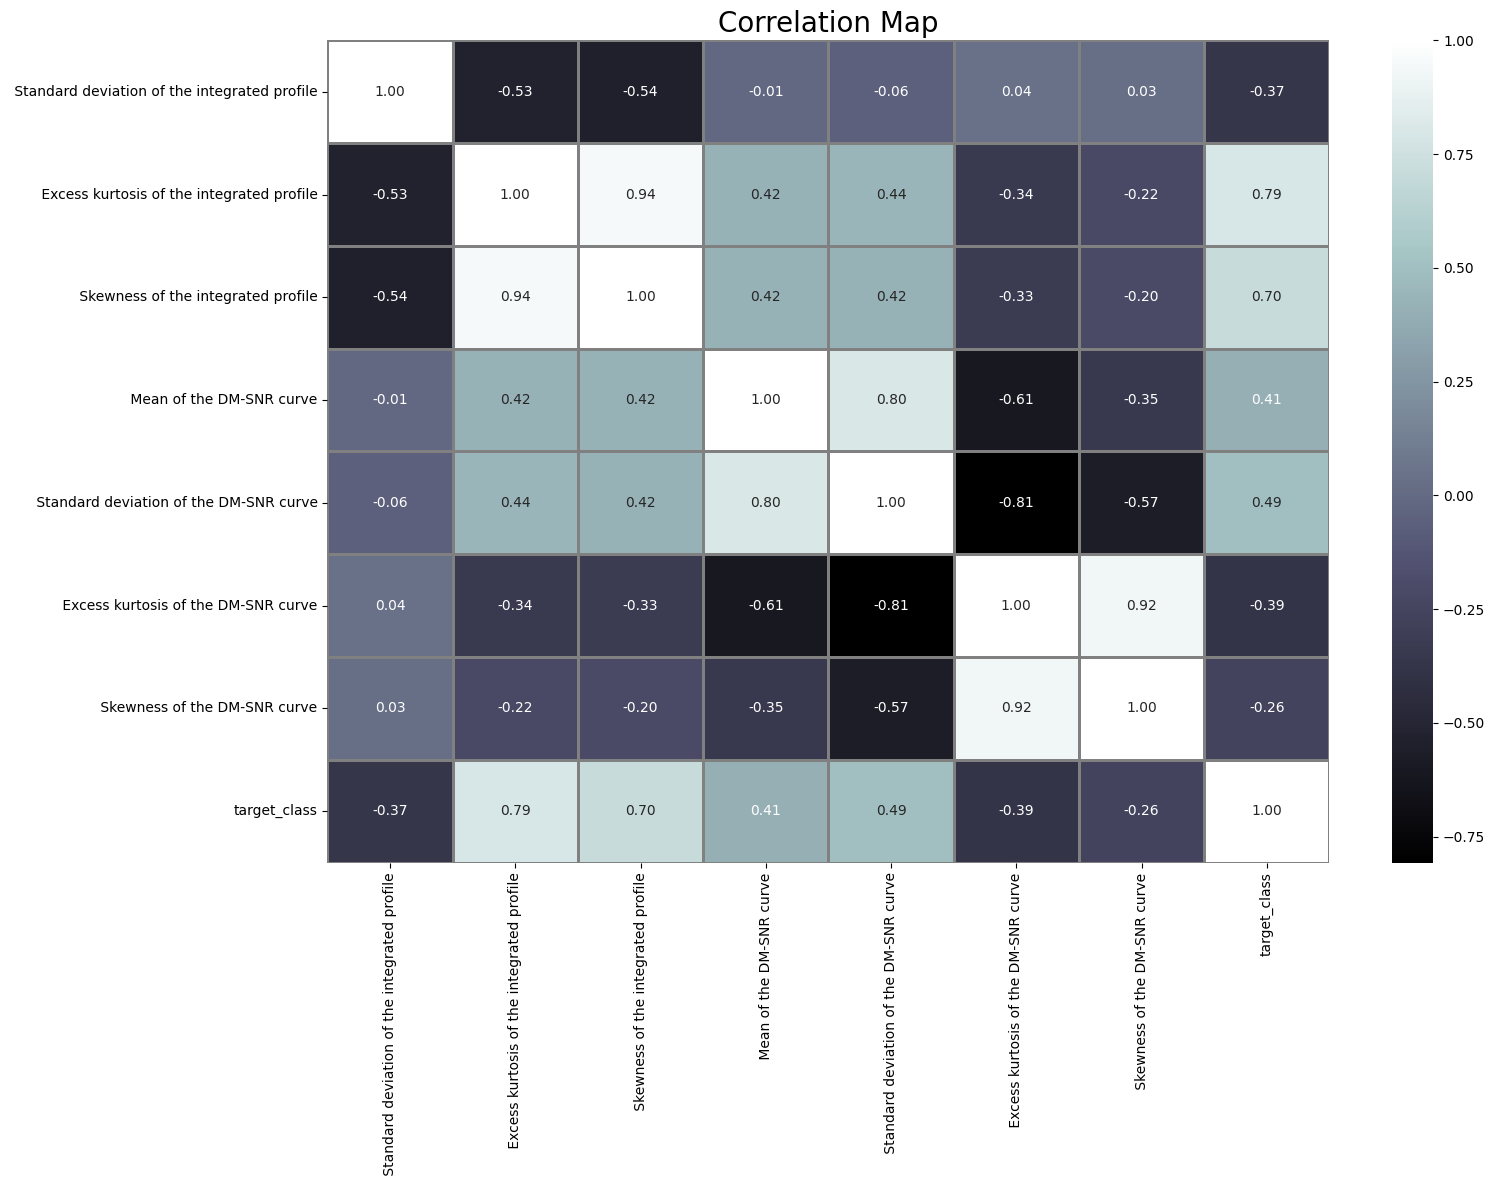

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.corr(),annot=True,cmap="bone",linewidths=1,fmt=".2f",linecolor="gray")
plt.title("Correlation Map",fontsize=20)
plt.tight_layout()
plt.show()

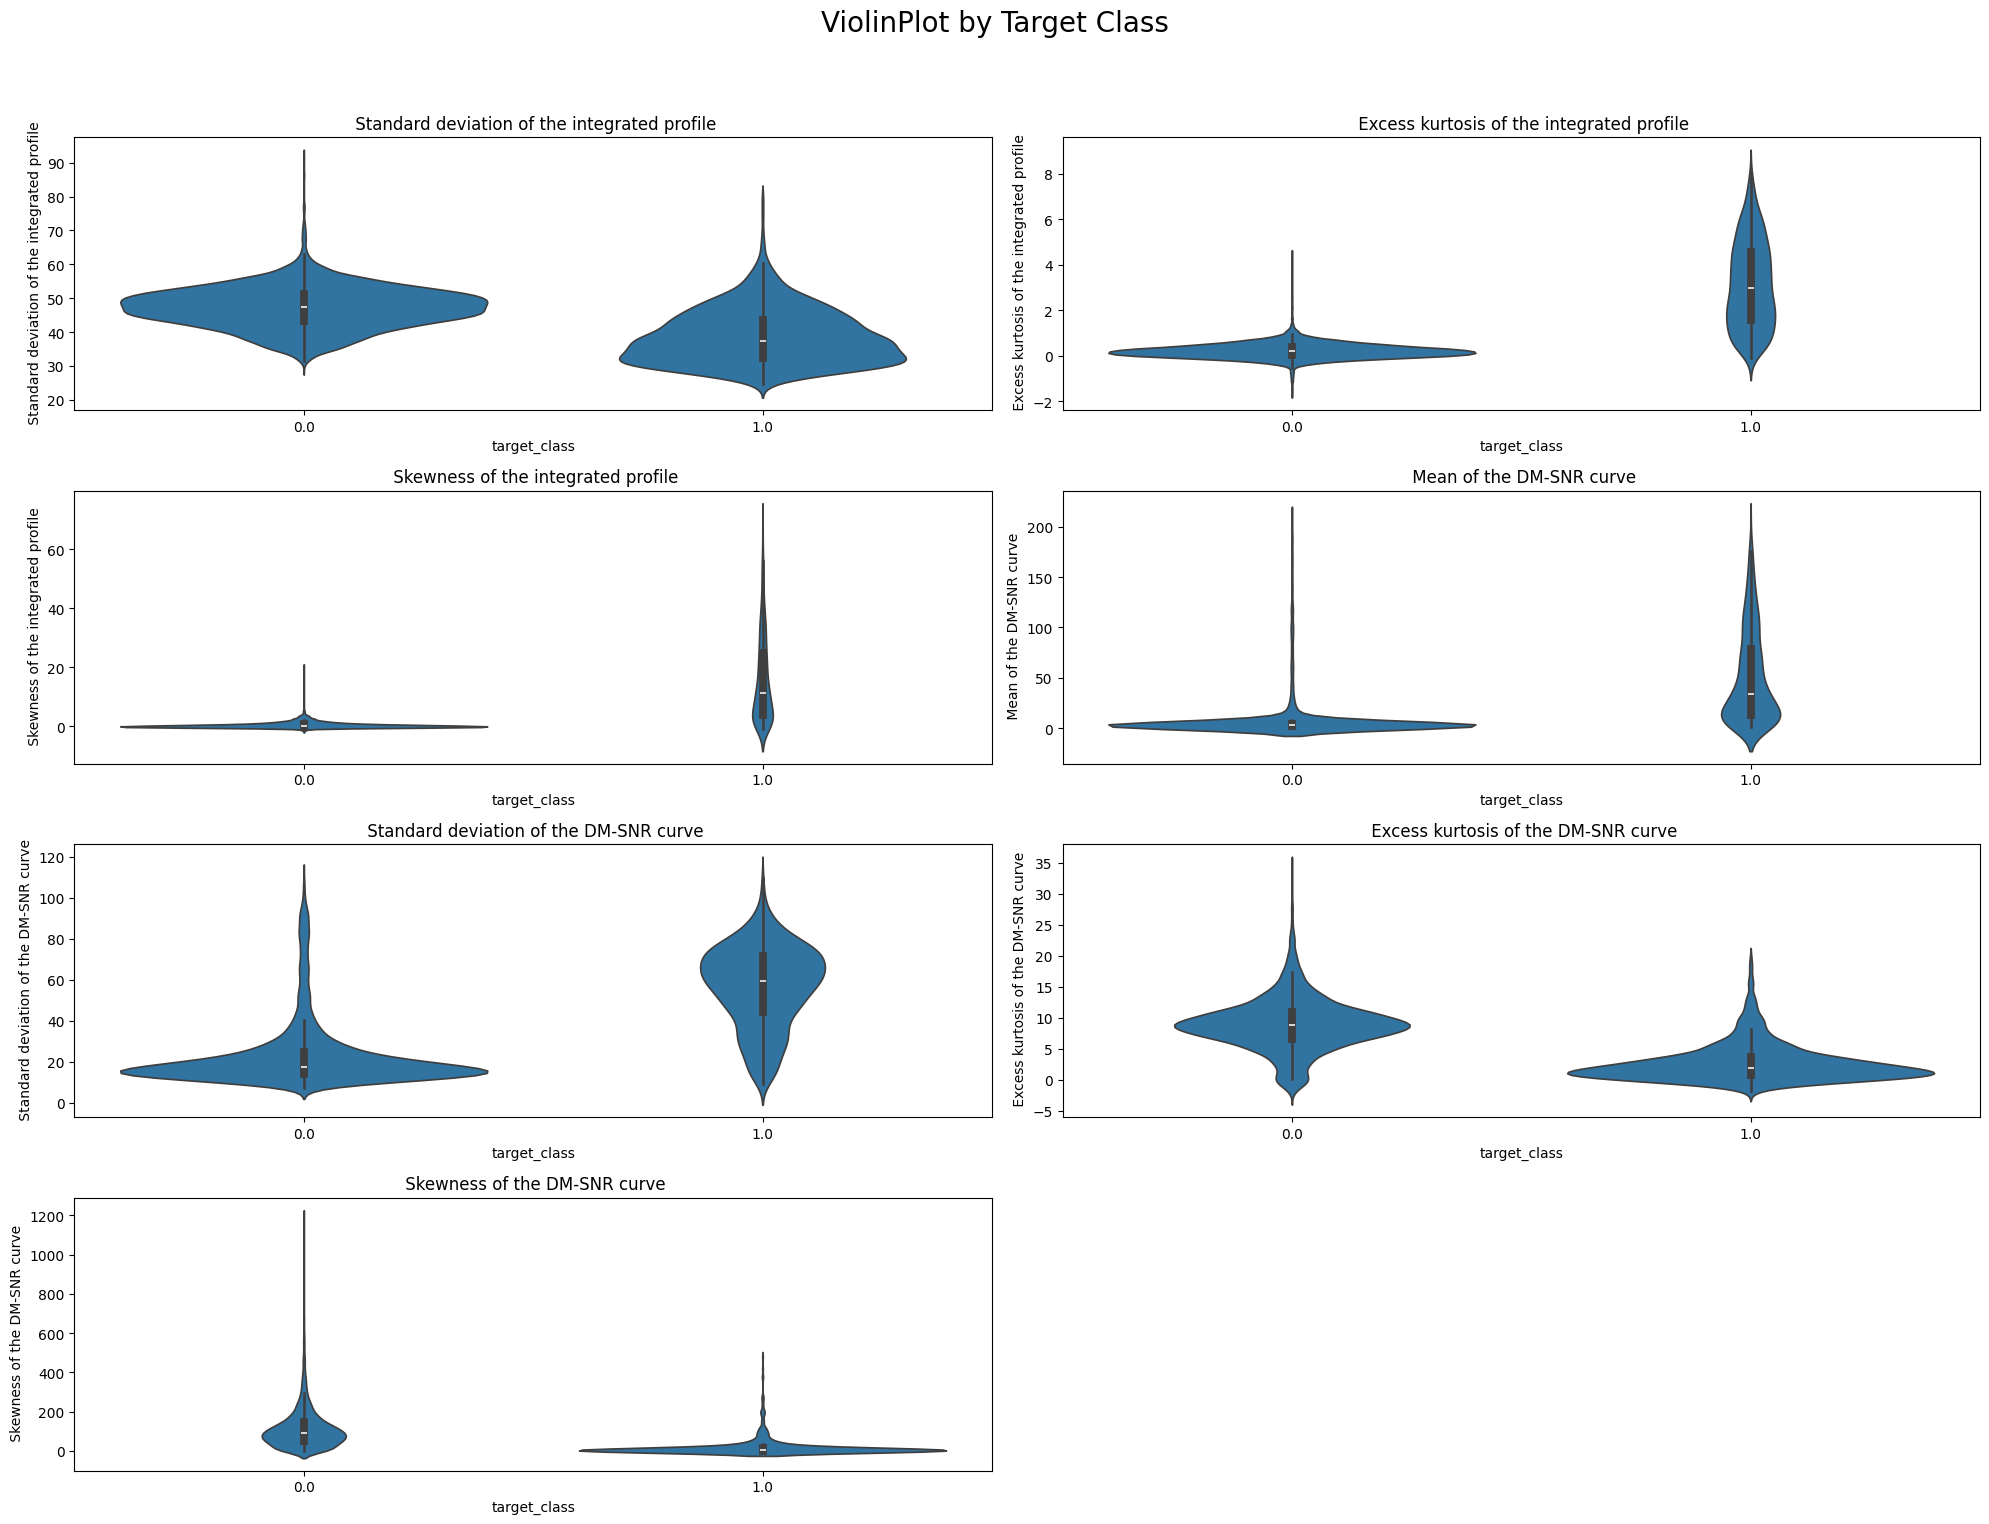

In [ ]:
plt.figure(figsize=(20,16))
feature_cols = [
    " Standard deviation of the integrated profile",
    " Excess kurtosis of the integrated profile",
    " Skewness of the integrated profile",
    " Mean of the DM-SNR curve",
    " Standard deviation of the DM-SNR curve",
    " Excess kurtosis of the DM-SNR curve",
    " Skewness of the DM-SNR curve"
]

n_rows = 4
n_cols = 2

for i, col in enumerate(feature_cols):
    plt.subplot(n_rows, n_cols, i + 1) # Menggunakan indeks subplot yang unik (i + 1)
    sns.violinplot(data=df, y=col, x="target_class")
    plt.title(col) # Tambahkan judul untuk setiap subplot

# Hapus subplot terakhir jika jumlah plot ganjil (kita punya 7 plot, 4x2=8 subplot)
if len(feature_cols) < n_rows * n_cols:
    plt.delaxes(plt.subplot(n_rows, n_cols, len(feature_cols) + 1))


plt.suptitle("ViolinPlot by Target Class",fontsize=20) # Judul keseluruhan

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Sesuaikan layout agar judul tidak bertabrakan
plt.show()

Fuzzy (Mamdani)

In [ ]:
import numpy as np
import skfuzzy.control as ctrl
# Define fuzzy input variables
x_std_integrated = ctrl.Antecedent(np.arange(df_balanced[' Standard deviation of the integrated profile'].min(), df_balanced[' Standard deviation of the integrated profile'].max(), 0.1), 'std_integrated')
x_kurtosis_integrated = ctrl.Antecedent(np.arange(df_balanced[' Excess kurtosis of the integrated profile'].min(), df_balanced[' Excess kurtosis of the integrated profile'].max(), 0.1), 'kurtosis_integrated')
x_skewness_integrated = ctrl.Antecedent(np.arange(df_balanced[' Skewness of the integrated profile'].min(), df_balanced[' Skewness of the integrated profile'].max(), 0.1), 'skewness_integrated')
x_mean_dm_snr = ctrl.Antecedent(np.arange(df_balanced[' Mean of the DM-SNR curve'].min(), df_balanced[' Mean of the DM-SNR curve'].max(), 0.1), 'mean_dm_snr')
x_std_dm_snr = ctrl.Antecedent(np.arange(df_balanced[' Standard deviation of the DM-SNR curve'].min(), df_balanced[' Standard deviation of the DM-SNR curve'].max(), 0.1), 'std_dm_snr')
x_kurtosis_dm_snr = ctrl.Antecedent(np.arange(df_balanced[' Excess kurtosis of the DM-SNR curve'].min(), df_balanced[' Excess kurtosis of the DM-SNR curve'].max(), 0.1), 'kurtosis_dm_snr')
x_skewness_dm_snr = ctrl.Antecedent(np.arange(df_balanced[' Skewness of the DM-SNR curve'].min(), df_balanced[' Skewness of the DM-SNR curve'].max(), 0.1), 'skewness_dm_snr')

# Define fuzzy output variable
y_target_class = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'target_class')

In [ ]:
# Adding input membership
x_std_integrated['poor'] = fuzz.trimf(x_std_integrated.universe, [0, 0, 20])
x_std_integrated['average'] = fuzz.trimf(x_std_integrated.universe, [10, 30, 50])
x_std_integrated['good'] = fuzz.trimf(x_std_integrated.universe, [40, 60, 60])
x_kurtosis_integrated.automf(3)
x_skewness_integrated.automf(3)
x_mean_dm_snr.automf(3)
x_std_dm_snr.automf(3)
x_kurtosis_dm_snr.automf(3)
x_skewness_dm_snr.automf(3)

y_target_class['pulsar'] = fuzz.trimf(y_target_class.universe, [0.5, 1, 1])
y_target_class['non_pulsar'] = fuzz.trimf(y_target_class.universe, [0, 0, 0.5])

Text(0.5, 1.0, 'Membership Functions for Target Class (Output)')

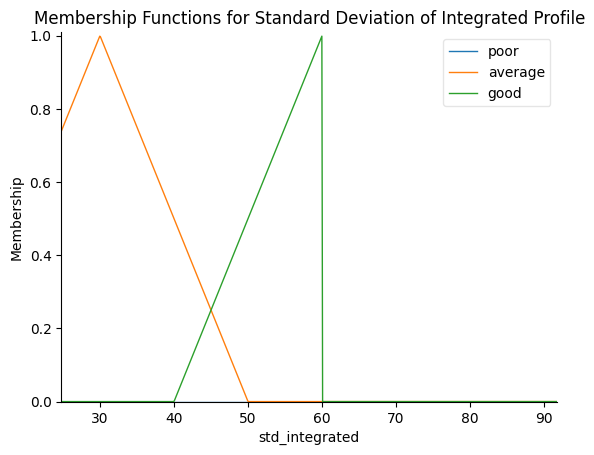

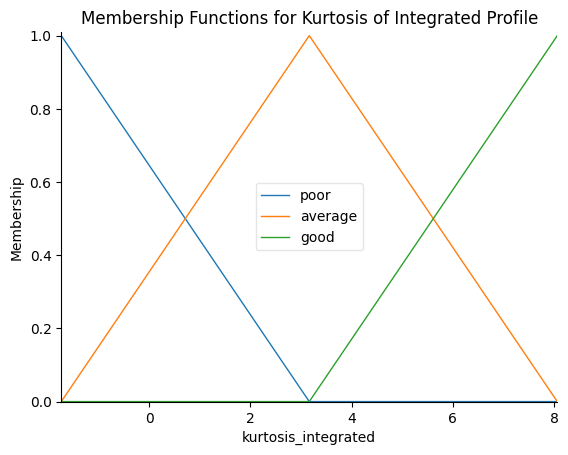

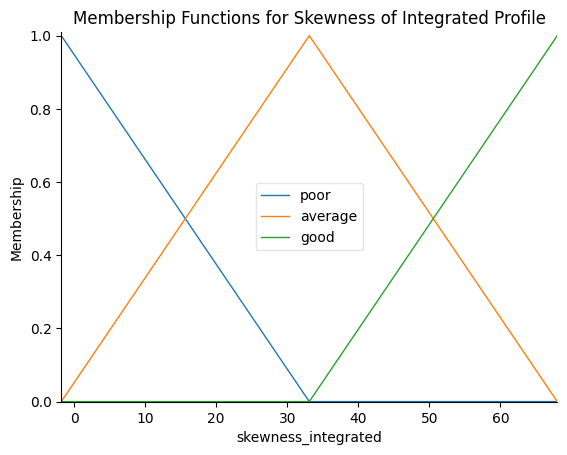

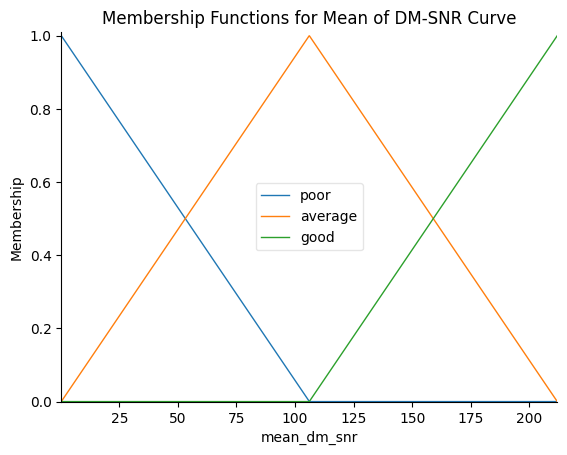

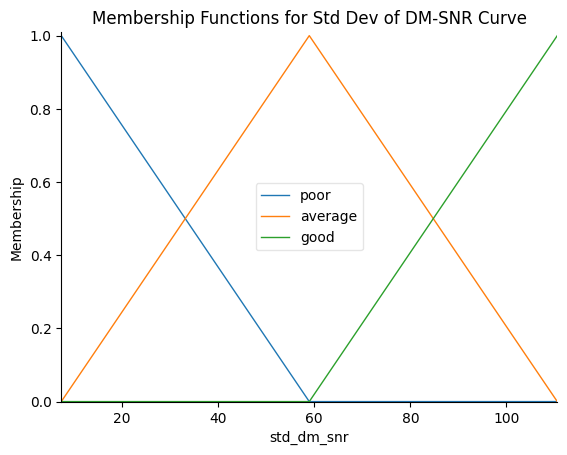

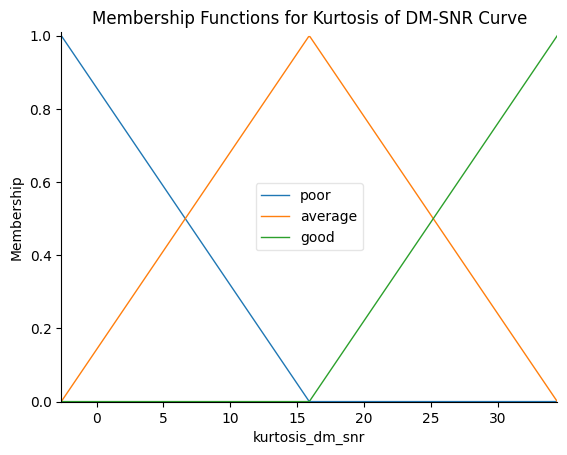

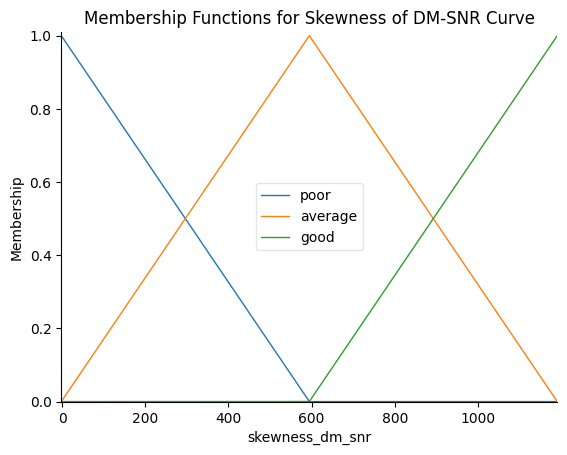

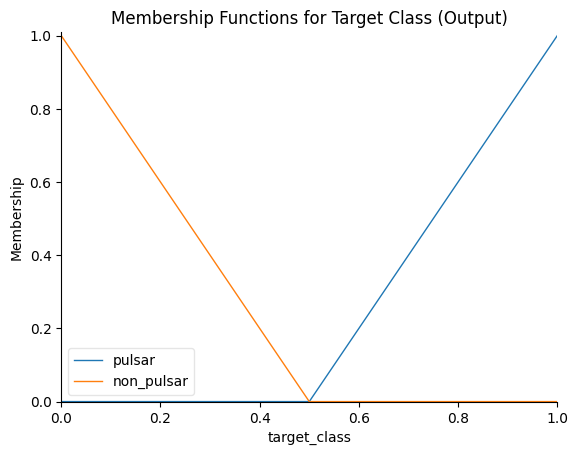

In [ ]:
x_std_integrated.view()
plt.title('Membership Functions for Standard Deviation of Integrated Profile')

x_kurtosis_integrated.view()
plt.title('Membership Functions for Kurtosis of Integrated Profile')

x_skewness_integrated.view()
plt.title('Membership Functions for Skewness of Integrated Profile')

x_mean_dm_snr.view()
plt.title('Membership Functions for Mean of DM-SNR Curve')

x_std_dm_snr.view()
plt.title('Membership Functions for Std Dev of DM-SNR Curve')

x_kurtosis_dm_snr.view()
plt.title('Membership Functions for Kurtosis of DM-SNR Curve')

x_skewness_dm_snr.view()
plt.title('Membership Functions for Skewness of DM-SNR Curve')

y_target_class.view()
plt.title('Membership Functions for Target Class (Output)')

In [ ]:
# Adding fuzzy rules

rule1 = fuzz.control.Rule(x_skewness_integrated['good'] & x_skewness_dm_snr['good'], y_target_class['non_pulsar'])
rule2 = fuzz.control.Rule(x_kurtosis_integrated['poor'] & x_kurtosis_dm_snr['poor'], y_target_class['non_pulsar'])
rule3 = fuzz.control.Rule(x_std_integrated['good'] & x_std_dm_snr['good'], y_target_class['pulsar'])
rule4 = fuzz.control.Rule(x_mean_dm_snr['good'], y_target_class['non_pulsar'])
rule5 = fuzz.control.Rule(x_kurtosis_integrated['good'] & x_mean_dm_snr['good'], y_target_class['non_pulsar'])
rule6 = fuzz.control.Rule(x_std_integrated['poor'] & x_kurtosis_dm_snr['good'], y_target_class['non_pulsar'])
rule7 = fuzz.control.Rule(x_skewness_dm_snr['poor'] & x_std_dm_snr['good'], y_target_class['pulsar'])

pulsar_ctrl = fuzz.control.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
pulsar_prediction = fuzz.control.ControlSystemSimulation(pulsar_ctrl)

In [ ]:
'''
# Adding fuzzy rules

rule1 = fuzz.control.Rule(x_skewness_integrated['good'] & x_skewness_dm_snr['good'], y_target_class['non_pulsar'])
rule2 = fuzz.control.Rule(x_kurtosis_integrated['poor'] & x_kurtosis_dm_snr['poor'], y_target_class['non_pulsar'])
rule3 = fuzz.control.Rule(x_std_integrated['good'] & x_std_dm_snr['good'], y_target_class['pulsar'])
rule4 = fuzz.control.Rule(x_mean_dm_snr['good'], y_target_class['non_pulsar'])
rule5 = fuzz.control.Rule(x_kurtosis_integrated['good'] & x_mean_dm_snr['good'], y_target_class['non_pulsar'])
rule6 = fuzz.control.Rule(x_std_integrated['poor'] & x_kurtosis_dm_snr['good'], y_target_class['non_pulsar'])
rule7 = fuzz.control.Rule(x_skewness_dm_snr['poor'] & x_std_dm_snr['good'], y_target_class['pulsar'])

pulsar_ctrl = fuzz.control.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
pulsar_prediction = fuzz.control.ControlSystemSimulation(pulsar_ctrl)
'''

"\n# Adding fuzzy rules\n\nrule1 = fuzz.control.Rule(x_skewness_integrated['good'] & x_skewness_dm_snr['good'], y_target_class['non_pulsar'])\nrule2 = fuzz.control.Rule(x_kurtosis_integrated['poor'] & x_kurtosis_dm_snr['poor'], y_target_class['non_pulsar'])\nrule3 = fuzz.control.Rule(x_std_integrated['good'] & x_std_dm_snr['good'], y_target_class['pulsar'])\nrule4 = fuzz.control.Rule(x_mean_dm_snr['good'], y_target_class['non_pulsar'])\nrule5 = fuzz.control.Rule(x_kurtosis_integrated['good'] & x_mean_dm_snr['good'], y_target_class['non_pulsar'])\nrule6 = fuzz.control.Rule(x_std_integrated['poor'] & x_kurtosis_dm_snr['good'], y_target_class['non_pulsar'])\nrule7 = fuzz.control.Rule(x_skewness_dm_snr['poor'] & x_std_dm_snr['good'], y_target_class['pulsar'])\n\npulsar_ctrl = fuzz.control.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])\npulsar_prediction = fuzz.control.ControlSystemSimulation(pulsar_ctrl)\n"

 Testing on first row of the dataset

In [ ]:
pulsar_prediction.input['std_integrated'] = df.iloc[0][' Standard deviation of the integrated profile']
pulsar_prediction.input['kurtosis_integrated'] = df.iloc[0][' Excess kurtosis of the integrated profile']
pulsar_prediction.input['skewness_integrated'] = df.iloc[0][' Skewness of the integrated profile']
pulsar_prediction.input['mean_dm_snr'] = df.iloc[0][' Mean of the DM-SNR curve']
pulsar_prediction.input['std_dm_snr'] = df.iloc[0][' Standard deviation of the DM-SNR curve']
pulsar_prediction.input['kurtosis_dm_snr'] = df.iloc[0][' Excess kurtosis of the DM-SNR curve']
pulsar_prediction.input['skewness_dm_snr'] = df.iloc[0][' Skewness of the DM-SNR curve']

# Compute the result
pulsar_prediction.compute()

print(pulsar_prediction.output['target_class'])

0.19858809466025798


The result seen above is a result of the prediction of fuzzy. If it shown value more than 0.5, the star is classified as pulsar star.

Testing using test set provided by the dataset

In [ ]:
path_test = "https://raw.githubusercontent.com/ZerXXX0/predicting-pulsar-star-using-machine-learning/refs/heads/main/pulsar_data_test.csv"
data = pd.read_csv(path_test,index_col = 0)

df_test = pd.DataFrame(data)
df_test = data.reset_index(drop=True)

In [ ]:
df_test.head()

,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN


Testing on the entire test set

In [ ]:
for i in range(len(df_test)):
  pulsar_prediction.input['std_integrated'] = df_test.iloc[i][' Standard deviation of the integrated profile']
  pulsar_prediction.input['kurtosis_integrated'] = df_test.iloc[i][' Excess kurtosis of the integrated profile']
  pulsar_prediction.input['skewness_integrated'] = df_test.iloc[i][' Skewness of the integrated profile']
  pulsar_prediction.input['mean_dm_snr'] = df_test.iloc[i][' Mean of the DM-SNR curve']
  pulsar_prediction.input['std_dm_snr'] = df_test.iloc[i][' Standard deviation of the DM-SNR curve']
  pulsar_prediction.input['kurtosis_dm_snr'] = df_test.iloc[i][' Excess kurtosis of the DM-SNR curve']
  pulsar_prediction.input['skewness_dm_snr'] = df_test.iloc[i][' Skewness of the DM-SNR curve']
  pulsar_prediction.compute()
  target_class_output = pulsar_prediction.output.get('target_class', None)
  if target_class_output is not None:
      if target_class_output > 0.5:
        print(f"Result of row {i} = {target_class_output}, The star is a pulsar star")
      else:
        print(f"Result of row {i} = {target_class_output}, The star is not a pulsar star")
  else:
      print(f"Could not determine target class for row {i}")

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
Result of row 370 = 0.4378118081408919, The star is a pulsar star
Result of row 371 = 0.45511054598886375, The star is a pulsar star
Result of row 372 = 0.43073458674437876, The star is a pulsar star
Result of row 373 = 0.5962329416366975, The star is not a pulsar star
Result of row 374 = 0.43448426107403126, The star is a pulsar star
Result of row 375 = 0.3802472676441134, The star is a pulsar star
Result of row 376 = 0.3863050410103711, The star is a pulsar star
Result of row 377 = 0.44448023919612434, The star is a pulsar star
Result of row 378 = 0.4198192483874051, The star is a pulsar star
Result of row 379 = 0.36246755385971374, The star is a pulsar star
Result of row 380 = 0.397881603853615, The star is a pulsar star
Result of row 381 = 0.4170468700298595, The star is a pulsar star
Result of row 382 = 0.422999176328881, The star is a pulsar star
Result of row 383 = 0.3637188159227275, The star is a pulsar star
Re

Metrics with train dataset

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

y_true = []
y_pred = []

for i in range(len(df_balanced)):
    pulsar_prediction.input['std_integrated'] = df_balanced.iloc[i][' Standard deviation of the integrated profile']
    pulsar_prediction.input['kurtosis_integrated'] = df_balanced.iloc[i][' Excess kurtosis of the integrated profile']
    pulsar_prediction.input['skewness_integrated'] = df_balanced.iloc[i][' Skewness of the integrated profile']
    pulsar_prediction.input['mean_dm_snr'] = df_balanced.iloc[i][' Mean of the DM-SNR curve']
    pulsar_prediction.input['std_dm_snr'] = df_balanced.iloc[i][' Standard deviation of the DM-SNR curve']
    pulsar_prediction.input['kurtosis_dm_snr'] = df_balanced.iloc[i][' Excess kurtosis of the DM-SNR curve']
    pulsar_prediction.input['skewness_dm_snr'] = df_balanced.iloc[i][' Skewness of the DM-SNR curve']

    pulsar_prediction.compute()
    target_class_output = pulsar_prediction.output.get('target_class', None)

    # Get the true label from the cleaned DataFrame
    true_label = df_balanced.iloc[i]['target_class']
    y_true.append(true_label)

    if target_class_output is not None:
        predicted_label = 0 if target_class_output < 0.5 else 1
        y_pred.append(predicted_label)
    else:
        # If the prediction failed, you could append a neutral class or skip it
        y_pred.append(0)  # Or: continue if you want to skip this instance

# ✅ Calculate classification metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

print("Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Metrics:
Accuracy:  0.7092
Precision: 0.9767
Recall:    0.4286
F1 Score:  0.5958
Confusion Matrix:
[[8337   86]
 [4813 3610]]


Sugeno

In [ ]:
import skfuzzy.control as ctrl
# Define fuzzy input variables (same as Mamdani)
x_std_integrated_sugeno = ctrl.Antecedent(np.arange(df_balanced[' Standard deviation of the integrated profile'].min(), df_balanced[' Standard deviation of the integrated profile'].max(), 0.1), 'std_integrated')
x_kurtosis_integrated_sugeno = ctrl.Antecedent(np.arange(df_balanced[' Excess kurtosis of the integrated profile'].min(), df_balanced[' Excess kurtosis of the integrated profile'].max(), 0.1), 'kurtosis_integrated')
x_skewness_integrated_sugeno = ctrl.Antecedent(np.arange(df_balanced[' Skewness of the integrated profile'].min(), df_balanced[' Skewness of the integrated profile'].max(), 0.1), 'skewness_integrated')
x_mean_dm_snr_sugeno = ctrl.Antecedent(np.arange(df_balanced[' Mean of the DM-SNR curve'].min(), df_balanced[' Mean of the DM-SNR curve'].max(), 0.1), 'mean_dm_snr')
x_std_dm_snr_sugeno = ctrl.Antecedent(np.arange(df_balanced[' Standard deviation of the DM-SNR curve'].min(), df_balanced[' Standard deviation of the DM-SNR curve'].max(), 0.1), 'std_dm_snr')
x_kurtosis_dm_snr_sugeno = ctrl.Antecedent(np.arange(df_balanced[' Excess kurtosis of the DM-SNR curve'].min(), df_balanced[' Excess kurtosis of the DM-SNR curve'].max(), 0.1), 'kurtosis_dm_snr')
x_skewness_dm_snr_sugeno = ctrl.Antecedent(np.arange(df_balanced[' Skewness of the DM-SNR curve'].min(), df_balanced[' Skewness of the DM-SNR curve'].max(), 0.1), 'skewness_dm_snr')

# Define input membership functions (same as Mamdani)
x_std_integrated_sugeno['poor'] = fuzz.trimf(x_std_integrated_sugeno.universe, [0, 0, 20])
x_std_integrated_sugeno['average'] = fuzz.trimf(x_std_integrated_sugeno.universe, [10, 30, 50])
x_std_integrated_sugeno['good'] = fuzz.trimf(x_std_integrated_sugeno.universe, [40, 60, 60])
x_kurtosis_integrated_sugeno.automf(3)
x_skewness_integrated_sugeno.automf(3)
x_mean_dm_snr_sugeno.automf(3)
x_std_dm_snr_sugeno.automf(3)
x_kurtosis_dm_snr_sugeno.automf(3)
x_skewness_dm_snr_sugeno.automf(3)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# STEP 0: (Re)define the same helper functions and ranges used in your Sugeno FIS

def trimf(x, a, b, c):
    return np.maximum(
        np.minimum((x - a) / (b - a + 1e-6), (c - x) / (c - b + 1e-6)),
        0
    )

def auto3(x, min_val, max_val):
    d = (max_val - min_val) / 3.0
    return {
        'poor': trimf(x, min_val, min_val + d, min_val + 2*d),
        'average': trimf(x, min_val + d, min_val + 1.5*d, max_val - d),
        'good': trimf(x, min_val + d, max_val - d, max_val),
    }

def std_integrated_fuzzify(x):
    return {
        'poor': trimf(x, 0, 0, 20),
        'average': trimf(x, 10, 30, 50),
        'good': trimf(x, 40, 60, 60),
    }

# Recompute min/max for each feature from df
def get_range(col):
    return df_balanced[col].min(), df_balanced[col].max()

ranges = {
    'std_integrated': get_range(' Standard deviation of the integrated profile'),
    'kurtosis_integrated': get_range(' Excess kurtosis of the integrated profile'),
    'skewness_integrated': get_range(' Skewness of the integrated profile'),
    'mean_dm_snr': get_range(' Mean of the DM-SNR curve'),
    'std_dm_snr': get_range(' Standard deviation of the DM-SNR curve'),
    'kurtosis_dm_snr': get_range(' Excess kurtosis of the DM-SNR curve'),
    'skewness_dm_snr': get_range(' Skewness of the DM-SNR curve'),
}

def fuzzify_all(inputs):
    fuzzified = {}
    fuzzified['std_integrated'] = std_integrated_fuzzify(inputs['std_integrated'])
    fuzzified['kurtosis_integrated'] = auto3(inputs['kurtosis_integrated'], *ranges['kurtosis_integrated'])
    fuzzified['skewness_integrated'] = auto3(inputs['skewness_integrated'], *ranges['skewness_integrated'])
    fuzzified['mean_dm_snr'] = auto3(inputs['mean_dm_snr'], *ranges['mean_dm_snr'])
    fuzzified['std_dm_snr'] = auto3(inputs['std_dm_snr'], *ranges['std_dm_snr'])
    fuzzified['kurtosis_dm_snr'] = auto3(inputs['kurtosis_dm_snr'], *ranges['kurtosis_dm_snr'])
    fuzzified['skewness_dm_snr'] = auto3(inputs['skewness_dm_snr'], *ranges['skewness_dm_snr'])
    return fuzzified

# STEP 1: Re‐encode your seven Sugeno rules as tuples of (antecedent_dict, crisp_output)

rules = [
    # rule1: x_skewness_integrated['good'] & x_skewness_dm_snr['good'] → non_pulsar
    ({'skewness_integrated': 'good', 'skewness_dm_snr': 'good'}, 0.0),

    # rule2: x_kurtosis_integrated['poor'] & x_kurtosis_dm_snr['poor'] → non_pulsar
    ({'kurtosis_integrated': 'poor', 'kurtosis_dm_snr': 'poor'}, 0.0),

    # rule3: x_std_integrated['good'] & x_std_dm_snr['good'] → pulsar
    ({'std_integrated': 'good', 'std_dm_snr': 'good'}, 1.0),

    # rule4: x_mean_dm_snr['good'] → non_pulsar
    ({'mean_dm_snr': 'good'}, 0.0),

    # rule5: x_kurtosis_integrated['good'] & x_mean_dm_snr['good'] → non_pulsar
    ({'kurtosis_integrated': 'good', 'mean_dm_snr': 'good'}, 0.0),

    # rule6: x_std_integrated['poor'] & x_kurtosis_dm_snr['good'] → non_pulsar
    ({'std_integrated': 'poor', 'kurtosis_dm_snr': 'good'}, 0.0),

    # rule7: x_skewness_dm_snr['poor'] & x_std_dm_snr['good'] → pulsar
    ({'skewness_dm_snr': 'poor', 'std_dm_snr': 'good'}, 1.0),
]

# STEP 2: Sugeno inference function (same as before)
def sugeno_infer_all(inputs, rules):
    fuzzified = fuzzify_all(inputs)
    weighted_sum = 0.0
    total_weight = 0.0

    for antecedent_map, crisp_output in rules:
        # Compute membership degree for each antecedent, then take MIN (AND)
        degrees = [fuzzified[var][label] for var, label in antecedent_map.items()]
        rule_strength = np.min(degrees)
        weighted_sum += rule_strength * crisp_output
        total_weight += rule_strength

    if total_weight == 0:
        return 0.0
    return weighted_sum / total_weight


In [ ]:
# STEP 3: Loop over df to generate y_pred and y_true

y_true = []
y_pred = []

for i in range(len(df_balanced)):
    row = df_balanced.iloc[i]
    inputs = {
        'std_integrated': row[' Standard deviation of the integrated profile'],
        'kurtosis_integrated': row[' Excess kurtosis of the integrated profile'],
        'skewness_integrated': row[' Skewness of the integrated profile'],
        'mean_dm_snr': row[' Mean of the DM-SNR curve'],
        'std_dm_snr': row[' Standard deviation of the DM-SNR curve'],
        'kurtosis_dm_snr': row[' Excess kurtosis of the DM-SNR curve'],
        'skewness_dm_snr': row[' Skewness of the DM-SNR curve'],
    }
    # Compute Sugeno output (0..1)
    sug_out = sugeno_infer_all(inputs, rules)

    # Threshold at 0.5
    predicted_label = 1 if sug_out > 0.5 else 0
    y_pred.append(predicted_label)

    true_label = row['target_class']
    y_true.append(true_label)

# STEP 4: Compute and Print Metrics

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

print("Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Metrics:
Accuracy:  0.5632
Precision: 0.8473
Recall:    0.1541
F1 Score:  0.2608
Confusion Matrix:
[[8189  234]
 [7125 1298]]
